## 구간 분할, 이산화 그리고 선형 모델, 트리 모델
- Binning(구간 분할) or Discretization(이산화)

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print()
for i in range(10):
    print(X[i], y[i])

X.shape: (100, 1)
y.shape: (100,)

[-0.753] -0.3979485798878842
[2.704] 0.7105775485755936
[1.392] 0.41392866721449156
[0.592] -0.3483837936512941
[-2.064] -1.6020040642044855
[-2.064] -1.3135709853245343
[-2.651] -0.12426799844607195
[2.197] 1.1366058452312982
[0.607] 0.22684365004805757
[1.248] -0.10700112891754687


In [2]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print("line.shape:", line.shape)
print(line)

line.shape: (1000, 1)
[[-3.   ]
 [-2.994]
 [-2.988]
 [-2.982]
 [-2.976]
 [-2.97 ]
 [-2.964]
 [-2.958]
 [-2.952]
 [-2.946]
 [-2.94 ]
 [-2.934]
 [-2.928]
 [-2.922]
 [-2.916]
 [-2.91 ]
 [-2.904]
 [-2.898]
 [-2.892]
 [-2.886]
 [-2.88 ]
 [-2.874]
 [-2.868]
 [-2.862]
 [-2.856]
 [-2.85 ]
 [-2.844]
 [-2.838]
 [-2.832]
 [-2.826]
 [-2.82 ]
 [-2.814]
 [-2.808]
 [-2.802]
 [-2.796]
 [-2.79 ]
 [-2.784]
 [-2.778]
 [-2.772]
 [-2.766]
 [-2.76 ]
 [-2.754]
 [-2.748]
 [-2.742]
 [-2.736]
 [-2.73 ]
 [-2.724]
 [-2.718]
 [-2.712]
 [-2.706]
 [-2.7  ]
 [-2.694]
 [-2.688]
 [-2.682]
 [-2.676]
 [-2.67 ]
 [-2.664]
 [-2.658]
 [-2.652]
 [-2.646]
 [-2.64 ]
 [-2.634]
 [-2.628]
 [-2.622]
 [-2.616]
 [-2.61 ]
 [-2.604]
 [-2.598]
 [-2.592]
 [-2.586]
 [-2.58 ]
 [-2.574]
 [-2.568]
 [-2.562]
 [-2.556]
 [-2.55 ]
 [-2.544]
 [-2.538]
 [-2.532]
 [-2.526]
 [-2.52 ]
 [-2.514]
 [-2.508]
 [-2.502]
 [-2.496]
 [-2.49 ]
 [-2.484]
 [-2.478]
 [-2.472]
 [-2.466]
 [-2.46 ]
 [-2.454]
 [-2.448]
 [-2.442]
 [-2.436]
 [-2.43 ]
 [-2.424]
 [-2.418

(1000, 1)


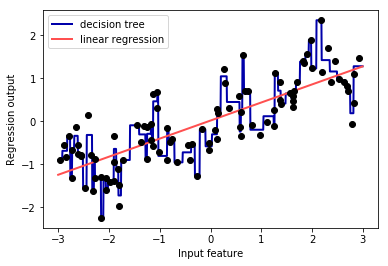

In [3]:
# min_samples_splits
# - The minimum number of samples required to split an internal node
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print(line.shape)

plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- 구간 분할(또는 이상화)
    - 연속형 데이터에 대하여 강력한 선형 모델을 만드는 방법 중 하나

In [4]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


- 첫번째 구간: 1 - [-3. -2.4)
- 두번째 구간: 2 - [-2.4 -1.8)
- ...
- 열번째 구간: 10 - [2.4 3.)

- np.digitize(X, bins)
  - X에 있는 데이터를 bins 기준으로 어느 구간에 속하는지를 기록
  - 즉, 연속형 데이터를 이산형 데이터로 변환

In [5]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- OneHotEncoder
  - 이산형 데이터를 One Hot 벡터로 변환

In [6]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


- One Hot 벡터로 인코딩된 데이터로 결정트리모델과 선형회귀모델을 새로 구성

line.shape: (1000, 1)
line_binned.shape: (1000, 10)


Text(0.5,0,'Input feature')

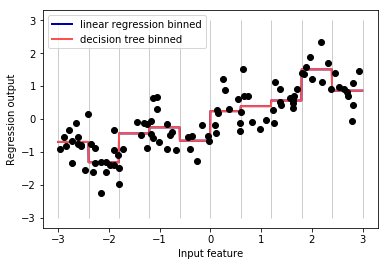

In [8]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
print("line.shape:", line.shape)

line_binned = encoder.transform(np.digitize(line, bins=bins))
print("line_binned.shape:", line_binned.shape)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

- 선형회귀 모델의 결과와 결정트리 모델 결과가 완전히 일치함
- 각 구간안에서는 특성의 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측함
- 데이터의 구간화 (binned or digitized) 변환후 동일한 모델에서 학습하였을 때의 결과
  - Linear Regression: 모델이 더 유연해짐 --> 큰 이득
  - DecisionTreeRegressor: 모델이 덜 유연해짐
- 즉, **선형 모델을 사용해야 할 때 데이터 구간화는 모델 성능을 높혀줌**